#### Import the required library packages

In [2]:
import numpy as np
import pandas as pd
import joblib

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.svm import SVC 
from sklearn.tree import export_graphviz 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

print('Packages imported!')

Packages imported!


## 1. HR Analytics <a id='hr_header' /> 

1. [Load and Sample the data](#load)
2. [Feature Selection](#feature)
2. [Build and Tune Models](#build)
3. [Create an Ensemble Model and Evaluate](#evaluate)
4. [Summary](#summary)

### 1.1 Load and Sample the data <a id='load' /> 

#### 1.1.1 Load cleansed HR Analytics dataset

In [3]:
df_hr = pd.read_csv('hr_data_new.csv', header=0)
df_hr.head(10)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Analytics,Finance,...,region_5,region_6,region_7,region_8,region_9,Bachelor's,Below Secondary,Master's & above,f,m
0,1,0.375,5.0,0.060606,1,0,0.155172,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0.325,5.0,0.151515,1,0,0.172414,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0.750,4.0,0.484848,1,0,0.103448,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0.250,3.0,0.181818,1,0,0.741379,1,1,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0.350,5.0,0.181818,1,0,0.637931,1,0,0,...,0,0,0,0,0,0,0,1,0,1
5,1,0.450,4.0,0.030303,1,0,0.137931,1,0,0,...,0,0,0,0,0,0,0,1,0,1
6,1,0.250,3.0,0.060606,0,0,0.293103,1,0,0,...,0,0,0,0,0,1,0,0,0,1
7,1,0.550,5.0,0.303030,1,0,0.327586,1,0,0,...,0,0,0,0,0,0,0,1,1,0
8,1,0.300,5.0,0.060606,1,0,0.482759,1,0,0,...,0,0,1,0,0,0,0,1,0,1
9,1,0.275,5.0,0.090909,1,0,0.379310,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [4]:
# Set the "is_promoted" as target/model output and the rest features as model inputs
y_data = df_hr['is_promoted']
x_data = df_hr.drop('is_promoted',axis=1)

In [5]:
# Split the data into training, validation and testing data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=2)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=2)

In [6]:
# Verify that data split is successful
for data in (y_train, y_val, y_test):
    print(round(len(data) / len(y_data), 2))

0.6
0.2
0.2


HR Analytics dataset is split into 60% for training, 20% for validation and 20% for testing

#### 1.1.2 Split and store HR Analytics data as CSV files

In [7]:
x_train.to_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/HRAnalyticsSplit/train_HR_features.csv',index=False)
x_val.to_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/HRAnalyticsSplit/val_HR_features.csv',index=False)
x_test.to_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/HRAnalyticsSplit/test_HR_features.csv',index=False)

y_train.to_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/HRAnalyticsSplit/train_HR_labels.csv',index=False)
y_val.to_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/HRAnalyticsSplit/val_HR_labels.csv',index=False)
y_test.to_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/HRAnalyticsSplit/test_HR_labels.csv',index=False)

In [8]:
# Read split HR Analytics data
tr_features = pd.read_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/HRAnalyticsSplit/train_HR_features.csv')
val_features = pd.read_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/HRAnalyticsSplit/val_HR_features.csv')
test_features = pd.read_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/HRAnalyticsSplit/test_HR_features.csv')

tr_labels = pd.read_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/HRAnalyticsSplit/train_HR_labels.csv')
val_labels = pd.read_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/HRAnalyticsSplit/val_HR_labels.csv')
test_labels = pd.read_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/HRAnalyticsSplit/test_HR_labels.csv')

[Back to Top ^](#hr_header)

### 1.2 Feature Selection<a id='feature' /> 

#### Build a CART model to identify high importance features for the HR Analytics dataset

In [1]:
# Define Hyperparameter Tuning Function
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means,stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3),round(std * 2,3), params))

In [9]:
# Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeClassifier(max_depth = 2)
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 8, 10, 12, 14, 16], 'max_depth' : [2,3,4,5,6,7,8]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(tr_features, tr_labels)

print(gs.best_score_)
print(gs.best_params_)

0.7906626131792699
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 12}


In [10]:
# Create Decision Tree using the best hyperparameters
decision_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth = 5, min_samples_leaf = 1, min_samples_split = 2, random_state=2)
decision_tree.fit(tr_features, tr_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [11]:
# Export our trained model as a .dot file
export_graphviz(decision_tree,
                out_file="./tree.dot",
                max_depth = 5 ,
                impurity = True,
                feature_names = list(df_hr.drop('is_promoted',axis=1)),
                class_names = ['Not Promoted', 'Promoted'],
                rounded = True,
                filled= True )

In [12]:
#Convert the .dot file to .png file and displayed in the below Markdown cell
!dot -Tpng tree.dot -o tree1.png

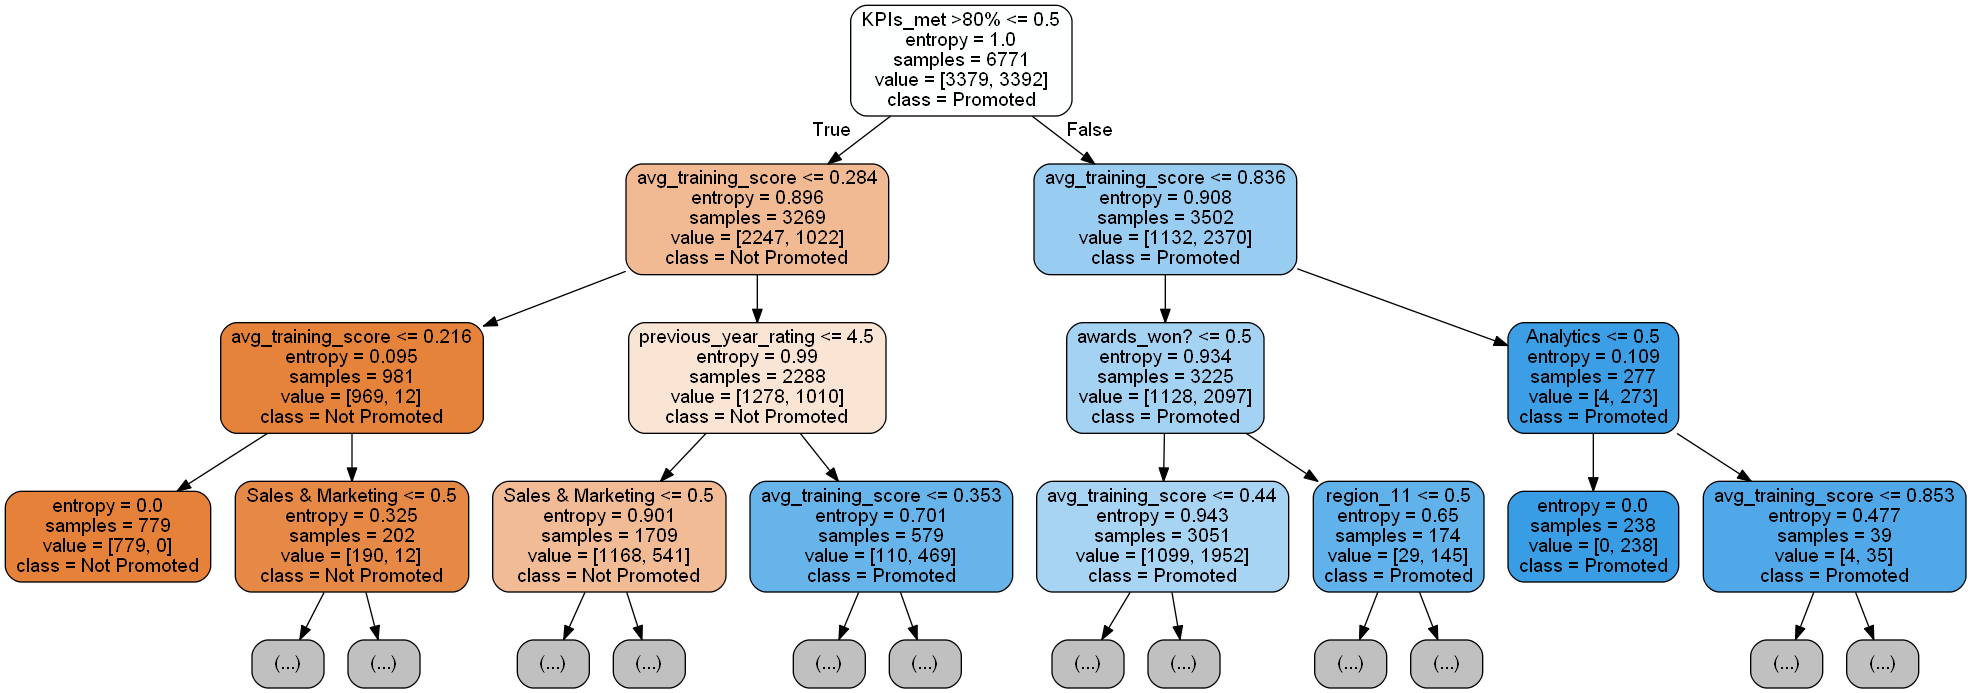

#### Initial CART accuracy for the HR Analytics dataset

In [13]:
print('CART training accuracy is', decision_tree.score(tr_features, tr_labels))
print('CART testing accuracy is', decision_tree.score(test_features, test_labels))

CART training accuracy is 0.7798345805435211
CART testing accuracy is 0.7672770230360307


#### 1.2.1a Random Forest - Ensemble of Decision Trees for the HR Analytics dataset

Although a Decision Tree or CART allows us to quickly see important variables, the Random Forest model allows for a more robust system of selection owing to its ability to build independent Decision Trees and aggregate them in order to identify top features.

Random Forest allows the quick dataset benchmarking and the identification of important predictor variables through a majority voting mechanism based on gini impurity reduction or information gain for classification problems. 

Hence, we will use this instead of the CART.

In [14]:
# Using 5 K-folds cross-validation, we will use GridSearchCV to tune the max_depth and n_estimator parameters for the RF model
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 500],
    'max_depth': [2, 4, 6, 8, 16, 32, 64, None]

}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features,tr_labels.values.ravel())

print_results(cv)

Best Parameters: {'max_depth': 32, 'n_estimators': 500}

0.664 (+/-0.059) for {'max_depth': 2, 'n_estimators': 5}
0.729 (+/-0.026) for {'max_depth': 2, 'n_estimators': 50}
0.722 (+/-0.03) for {'max_depth': 2, 'n_estimators': 100}
0.728 (+/-0.019) for {'max_depth': 2, 'n_estimators': 500}
0.707 (+/-0.038) for {'max_depth': 4, 'n_estimators': 5}
0.744 (+/-0.025) for {'max_depth': 4, 'n_estimators': 50}
0.747 (+/-0.014) for {'max_depth': 4, 'n_estimators': 100}
0.749 (+/-0.027) for {'max_depth': 4, 'n_estimators': 500}
0.732 (+/-0.041) for {'max_depth': 6, 'n_estimators': 5}
0.759 (+/-0.025) for {'max_depth': 6, 'n_estimators': 50}
0.761 (+/-0.025) for {'max_depth': 6, 'n_estimators': 100}
0.761 (+/-0.02) for {'max_depth': 6, 'n_estimators': 500}
0.752 (+/-0.026) for {'max_depth': 8, 'n_estimators': 5}
0.763 (+/-0.025) for {'max_depth': 8, 'n_estimators': 50}
0.764 (+/-0.017) for {'max_depth': 8, 'n_estimators': 100}
0.764 (+/-0.017) for {'max_depth': 8, 'n_estimators': 500}
0.753 (+/-0.0

The best max_depth and n_estimator hyperparameters for our RandomForest Model is 32 and 500, respectively.

In [15]:
# Checking the RF accuracy by using the Score function
print('rf training accuracy is: ',cv.score(tr_features,tr_labels))
print('rf testing accuracy is: ',cv.score(test_features,test_labels))

rf training accuracy is:  1.0
rf testing accuracy is:  0.7991730655640874


The perfect training accuracy score but significantly lower testing accuracy indicates significant overfitting.

#### 1.2.1b Feature Selection - Trees Classifiers (Filter Method) and Recursive Feature Elimination (Wrapper Method)

#### Random Trees

In [16]:
# Identifying important features using Random Forest
feature_importances = pd.DataFrame(cv.best_estimator_.feature_importances_,
                                   index = tr_features.columns,
                                    columns=['importance']).sort_values('importance',                                                                 
                                                                        ascending=False)
feature_importances

,importance
avg_training_score,0.223245
KPIs_met >80%,0.133598
age,0.106307
previous_year_rating,0.099719
length_of_service,0.088628
awards_won?,0.032421
Sales & Marketing,0.026450
no_of_trainings,0.021968
Operations,0.017620
region_2,0.013299


#### Extra Trees Classifiers

In [17]:
# Identifying important features using Extra Trees (another Tree-based model)
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(tr_features,tr_labels.values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[3.10436535e-02 1.07059288e-01 1.07808066e-01 9.75721828e-02
 1.33008690e-01 3.74741309e-02 1.96560355e-01 9.68107564e-03
 7.48586030e-03 4.94002094e-03 3.54170023e-03 1.51768729e-02
 1.47539464e-02 4.19586325e-03 2.07633648e-02 9.46353163e-03
 3.42702957e-03 3.37744718e-03 5.01923817e-03 1.69875688e-03
 7.42644120e-03 3.80195016e-03 8.95645176e-03 4.33588860e-03
 4.33056547e-03 7.35853965e-06 3.31151924e-03 1.29258058e-02
 4.20313098e-03 1.80373006e-03 1.11373009e-02 5.05364687e-03
 2.17228967e-03 4.08770795e-03 7.33399806e-03 6.16891246e-03
 5.86158170e-03 3.93173688e-03 2.01188101e-03 3.47174417e-03
 5.37476138e-03 3.28498739e-03 1.70770354e-03 1.18630294e-03
 8.89737028e-03 3.21783489e-03 2.10845941e-03 9.58287999e-03
 3.74257112e-03 1.32018057e-03 7.04415880e-03 1.72973920e-03
 7.11241306e-03 1.33786653e-02 1.39272575e-02]


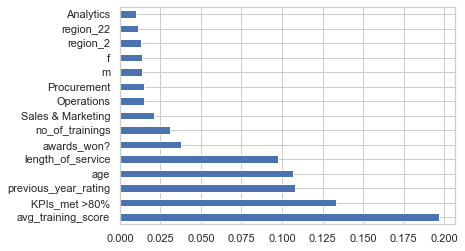

In [18]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=tr_features.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

Based on an ensemble of 500 independent decision trees, the top 15 features that achieved the highest votes for their importance are:
1. avg_training_score
2. KPIs_met >80%
3. age
4. previous_year_rating
5. length_of_service
6. awards_won?
7. Sales & Marketing
8. no_of_trainings
9. Operations
10. region_22
11. region_2
12. Analytics
13. Procurement
14. f
15. m

These features could be used to build a more refined model with improved model accuracy, while reducing dimensionality and complexity.

#### Recursive Feature Elimination

In [19]:
from sklearn.feature_selection import RFE

model = LogisticRegression(solver='lbfgs',max_iter=7000) # Initializing RFE model
rfe = RFE(model, 7) # Transforming data using RFE
X_rfe = rfe.fit_transform(x_data,y_data)  # Fitting the data to model
model.fit(X_rfe,y_data)

print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False  True  True False  True False False
 False  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]
[34  9 27  8  1  4  1  1  3  1  5  2 11  1  1  1 32 21 29 15 40 42 43 49
 19 35 25 39 12 14 18 23 30 17 26 45 37 10 36 31 48 13 24  6 16 33 22 20
 41  7 44 38 28 46 47]


In [20]:
# No of features
nof_list=np.arange(1,55)            
high_score=0

# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=2)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=2)
    model = LogisticRegression(solver='lbfgs',max_iter=7000)
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(x_train,y_train)
    X_test_rfe = rfe.transform(x_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)   
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 37
Score with 37 features: 0.790313


In [21]:
cols = list(x_data.columns)
model = LogisticRegression(solver='lbfgs',max_iter=7000) # Initializing RFE model
rfe = RFE(model, 37)             # Transforming data using RFE
X_rfe = rfe.fit_transform(x_data,y_data)  # Fitting the data to model
model.fit(X_rfe,y_data)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)
print('LR training accuracy is: ',model.score(X_rfe,y_data)) 

Index(['age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'Analytics', 'Finance', 'HR',
       'Legal', 'Operations', 'Procurement', 'R&D', 'Sales & Marketing',
       'Technology', 'region_10', 'region_11', 'region_12', 'region_17',
       'region_19', 'region_20', 'region_21', 'region_22', 'region_23',
       'region_24', 'region_25', 'region_26', 'region_29', 'region_30',
       'region_32', 'region_33', 'region_34', 'region_4', 'region_6',
       'region_7', 'region_9', 'Master's & above'],
      dtype='object')
LR training accuracy is:  0.7892249527410208


Based the findings of these feature selection methods, we will reduce the dimensionality of our dataset to the top 15 features identified. And reassess their accuracy on our training/validation/test sets to see the difference.

[Back to Top ^](#hr_header)

### 1.3 Build and Tune Models<a id='build' /> 

In [ ]:
tr_features = tr_features[['age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
                            'awards_won?', 'avg_training_score', 'no_of_trainings',
                            'Sales & Marketing','region_22','region_2','Operations','Analytics', 'Procurement', 
                            'f', 'm']]

val_features = val_features[['age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
                            'awards_won?', 'avg_training_score', 'no_of_trainings',
                            'Sales & Marketing','region_22','region_2','Operations','Analytics', 'Procurement', 
                            'f', 'm']]

test_features = test_features[['age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
                               'awards_won?', 'avg_training_score', 'no_of_trainings',
                               'Sales & Marketing','region_22','region_2','Operations','Analytics', 'Procurement',
                               'f', 'm']]

#### 1.3.1 Random Forest Classifier for the HR Analytics dataset

In [23]:
# Reassess the RF R^2 value/Accuracy by using the Score function, following feature selection
cv.fit(tr_features,tr_labels.values.ravel())
print('rf training accuracy is: ',cv.score(tr_features,tr_labels))
print('rf validation accuracy is: ',cv.score(val_features,val_labels))

rf training accuracy is:  0.9588420638046475
rf validation accuracy is:  0.7920850561134082


Compared to the initial run of the Random Forest model, the overfitting has been reduced, while validation accuracy has only dropped slightly compared to the previously overfitted model.

In [24]:
parameters = {
    'n_estimators': [500],
    'max_depth': [16],
    'min_samples_leaf': [5]

}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features,tr_labels.values.ravel())

print('rf training accuracy is: ',cv.score(tr_features,tr_labels))
print('rf testing accuracy is: ',cv.score(test_features,test_labels))

rf training accuracy is:  0.8499409216226861
rf testing accuracy is:  0.8027170702894271


By tuning the min_samples_leaf hyperparameter we were able to reduce overfitting by an even more significant amount and improve the final testing accuracy.

#### 1.3.2 XGBoost for the HR Analytics dataset

In [25]:
# Using 5 K-folds cross-validation, we will use GridSearchCV to tune the max_depth and alpha parameters for the XGBoost model
from xgboost import XGBClassifier
xg_class = XGBClassifier()
parameters = {
    'max_depth': [1, 3, 4, 5],
    'alpha': [5, 10, 15, 20],
    'n_estimators': [5, 10, 50, 100]
}

cv = GridSearchCV(xg_class, parameters, cv=5)
cv.fit(tr_features,tr_labels.values.ravel())

print_results(cv)

Best Parameters: {'alpha': 5, 'max_depth': 5, 'n_estimators': 50}

0.685 (+/-0.021) for {'alpha': 5, 'max_depth': 1, 'n_estimators': 5}
0.702 (+/-0.019) for {'alpha': 5, 'max_depth': 1, 'n_estimators': 10}
0.708 (+/-0.031) for {'alpha': 5, 'max_depth': 1, 'n_estimators': 50}
0.72 (+/-0.027) for {'alpha': 5, 'max_depth': 1, 'n_estimators': 100}
0.741 (+/-0.032) for {'alpha': 5, 'max_depth': 3, 'n_estimators': 5}
0.746 (+/-0.023) for {'alpha': 5, 'max_depth': 3, 'n_estimators': 10}
0.791 (+/-0.022) for {'alpha': 5, 'max_depth': 3, 'n_estimators': 50}
0.798 (+/-0.014) for {'alpha': 5, 'max_depth': 3, 'n_estimators': 100}
0.769 (+/-0.024) for {'alpha': 5, 'max_depth': 4, 'n_estimators': 5}
0.775 (+/-0.018) for {'alpha': 5, 'max_depth': 4, 'n_estimators': 10}
0.797 (+/-0.017) for {'alpha': 5, 'max_depth': 4, 'n_estimators': 50}
0.797 (+/-0.017) for {'alpha': 5, 'max_depth': 4, 'n_estimators': 100}
0.776 (+/-0.017) for {'alpha': 5, 'max_depth': 5, 'n_estimators': 5}
0.789 (+/-0.028) for {'al

The best alpha, max_depth and n_estimator hyperparameters for our XGBoostClassifier Model is 5, 5 and 50, respectively.

In [26]:
print('XGBoostClassifier training accuracy is: ',cv.score(tr_features,tr_labels))
print('XGBoostClassifier validation accuracy is: ',cv.score(val_features,val_labels))

XGBoostClassifier training accuracy is:  0.8190232374950768
XGBoostClassifier validation accuracy is:  0.8080330773774365


In [27]:
parameters = {
    'max_depth': [5],
    'alpha': [5],
    'n_estimators': [50],
    'learning_rate': [0.17]
    
}

cv = GridSearchCV(xg_class, parameters, cv=5)
cv.fit(tr_features,tr_labels.values.ravel())

print('XGBoostClassifier training accuracy is: ',cv.score(tr_features,tr_labels))
print('XGBoostClassifier testing accuracy is: ',cv.score(test_features,test_labels))

XGBoostClassifier training accuracy is:  0.8355651831429697
XGBoostClassifier testing accuracy is:  0.8168930891907856


Tuning the XGBoost Classfier's learning_rate hyperparameter to 0.17 (after experimenting on a range of values from 0.01 to 0.2) yielded the highest training and testing accuracy on the dataset. 

#### 1.3.3 Support Vector Machine (SVM) Classifier for the HR Analytics dataset

In [28]:
# Using 5 K-folds cross-validation, we will use GridSearchCV to tune the kernel and C parameters for the SVM model
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features,tr_labels.values.ravel())

print_results(cv)

Best Parameters: {'C': 100, 'kernel': 'rbf'}

0.727 (+/-0.018) for {'C': 0.1, 'kernel': 'linear'}
0.73 (+/-0.029) for {'C': 0.1, 'kernel': 'rbf'}
0.714 (+/-0.026) for {'C': 0.1, 'kernel': 'poly'}
0.448 (+/-0.034) for {'C': 0.1, 'kernel': 'sigmoid'}
0.776 (+/-0.026) for {'C': 1, 'kernel': 'linear'}
0.755 (+/-0.021) for {'C': 1, 'kernel': 'rbf'}
0.752 (+/-0.019) for {'C': 1, 'kernel': 'poly'}
0.458 (+/-0.036) for {'C': 1, 'kernel': 'sigmoid'}
0.78 (+/-0.024) for {'C': 10, 'kernel': 'linear'}
0.789 (+/-0.014) for {'C': 10, 'kernel': 'rbf'}
0.773 (+/-0.02) for {'C': 10, 'kernel': 'poly'}
0.455 (+/-0.038) for {'C': 10, 'kernel': 'sigmoid'}
0.781 (+/-0.024) for {'C': 100, 'kernel': 'linear'}
0.797 (+/-0.017) for {'C': 100, 'kernel': 'rbf'}
0.788 (+/-0.018) for {'C': 100, 'kernel': 'poly'}
0.455 (+/-0.038) for {'C': 100, 'kernel': 'sigmoid'}


The best C and kernel hyperparameters for our SVM Model is 100 and rbf,respectively

In [29]:
print('SVM training accuracy is: ',cv.score(tr_features,tr_labels))
print('SVM validation accuracy is: ',cv.score(val_features,val_labels))

SVM training accuracy is:  0.8194170933438362
SVM validation accuracy is:  0.7914943886591849


In [30]:
parameters = {
    'kernel': ['rbf'],
    'C': [100],
    'gamma': [0.1]
    
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features,tr_labels.values.ravel())

print('SVM training accuracy is: ',cv.score(tr_features,tr_labels))
print('SVM testing accuracy is: ',cv.score(test_features,test_labels))

SVM training accuracy is:  0.82926348956282
SVM testing accuracy is:  0.8003544004725339


Tuning the gamma hyperparameter of the SVC to 0.1 yielded a higher accuracy without significant overfitting.

[Back to Top ^](#hr_header)

### 1.4 Create an Ensemble Model and Evaluate <a id='evaluate' /> 

#### Ensemble Model built using Random Forest, XGBoost Classifier and Support Vector Machine for HR Analytics dataset

In [34]:
# Voting Classifier - Multiple Ensemble Model
rf = RandomForestClassifier(n_estimators=500, max_depth = 16, min_samples_leaf=5)
xg_class = XGBClassifier(max_depth=5, alpha=5, n_estimators=50, learning_rate=0.17)
svm = SVC(C=100, kernel='rbf', gamma=0.1)

In [35]:
evc = VotingClassifier(estimators = [('rf',rf),('xg_class',xg_class),('svm',svm)], voting='hard')

In [36]:
evc.fit(tr_features, tr_labels.values.ravel())
print('EVC training accuracy is', evc.score(tr_features, tr_labels.values.ravel()))
print('EVC testing accuracy is', evc.score(test_features, test_labels.values.ravel()))

EVC training accuracy is 0.840882237101221
EVC testing accuracy is 0.8109864146485528


[Back to Top ^](#hr_header)

### 1.5 Summary <a id='summary' /> 

1. The XGBoost Classifier model is the most accurate of the regression models with a testing accuracy of approximately 0.8169. 
2. The Ensemble Variable Classifier (EVC) model failed to yield the highest testing accuracy
3. Using feature importance analysis, the dataset was reduced to 15 variables, which helped to significantly reduce overfitting.
4. Model accuracy might be improved with additional details like the types of awards won.
5. Model accuracy might also be improved with more data records.

[Back to Top ^](#hr_header)

## 2. Airbnb Singapore <a id='airbnb_header' /> 

1. [Load and Sample the data](#load2)
2. [Feature Selection](#feature2)
3. [Build and Tune Models](#build2)
4. [Create an Ensemble Model and Evaluate](#evaluate2)
5. [Summary](#summary2)

### 2.1 Load and Sample the data <a id='load2' /> 

#### 2.1.1 Load cleansed AirBnb Singapore dataset

In [37]:
df_airbnb = pd.read_csv('listings_new.csv')
df_airbnb.head(10)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Entire home/apt,Private room,Shared room,Bedok,Bishan,...,Rochor,Serangoon,Singapore River,Southern Islands,Tanglin,Toa Payoh,Central Region,East Region,North Region,North-East Region
0,44,15,18,0.230000,331,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,276,4,11,0.130000,362,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,208,1,0,1.043669,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,128,3,0,1.043669,365,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,278,1,0,1.043669,365,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,150,1,2,0.050000,208,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,243,5,14,0.190000,143,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,35,18,6,0.150000,359,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,49,18,2,0.050000,360,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,137,6,10,0.140000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
# Set the "price" as target/model output and the rest features as model inputs
y_data2 = df_airbnb['price']
x_data2 = df_airbnb.drop('price',axis=1)

In [39]:
# Split the data into training, validation and testing data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, test_size=0.4, random_state=2)
x_val2, x_test2, y_val2, y_test2 = train_test_split(x_test2, y_test2, test_size=0.5, random_state=2)

In [40]:
# Verify that data split is successful
for data in (y_train2, y_val2, y_test2):
    print(round(len(data) / len(y_data2), 2))

0.6
0.2
0.2


AirBnb SG dataset is split into 60% for training, 20% for validation and 20% for testing

#### 2.1.2 Split and store Airbnb data as CSV files

In [41]:
x_train2.to_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/AirBnbSplit/train_Airbnb_features.csv',index=False)
x_val2.to_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/AirBnbSplit/val_Airbnb_features.csv',index=False)
x_test2.to_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/AirBnbSplit/test_Airbnb_features.csv',index=False)

y_train2.to_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/AirBnbSplit/train_Airbnb_labels.csv',index=False)
y_val2.to_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/AirBnbSplit/val_Airbnb_labels.csv',index=False)
y_test2.to_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/AirBnbSplit/test_Airbnb_labels.csv',index=False)

In [42]:
# Read split HR Analytics data
tr_features_airbnb = pd.read_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/AirBnbSplit/train_Airbnb_features.csv')
val_features_airbnb = pd.read_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/AirBnbSplit/val_Airbnb_features.csv')
test_features_airbnb = pd.read_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/AirBnbSplit/test_Airbnb_features.csv')

tr_labels_airbnb = pd.read_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/AirBnbSplit/train_Airbnb_labels.csv')
val_labels_airbnb = pd.read_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/AirBnbSplit/val_Airbnb_labels.csv')
test_labels_airbnb = pd.read_csv('C:/Users/Ervin/Desktop/NP 2019-2020/(FINAL SEM) Business Analytics/Predictive Analytics/Assignment 1 + 2/AirBnbSplit/test_Airbnb_labels.csv')

[Back to Top ^](#airbnb_header)

### 2.2 Feature Selection <a id='feature2' />

#### Build a CART model for the Airbnb SG dataset

In [43]:
# Create Decision Tree Regressor with random state equal to 2
tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=2)
tree_reg.fit(x_train2, y_train2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')

In [44]:
# Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeRegressor(max_depth = 2)

param_grid = { "criterion" : ["mse", "moe"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(x_train2, y_train2) # 

print(gs.best_score_)
print(gs.best_params_)

-3900.3539489132227
{'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [45]:
decision_tree = tree.DecisionTreeRegressor(criterion='mse', max_depth = 7, min_samples_leaf = 10, min_samples_split = 2, random_state=2)
decision_tree.fit(x_train2, y_train2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')

In [46]:
# Export our trained model as a .dot file
export_graphviz(
        tree_reg,
        out_file=("./regression_tree.dot"),
        feature_names=list(df_airbnb.drop('price',axis=1)),
        rounded=True,
        filled=True
    )

In [47]:
#Convert the .dot file to .png file and displayed in the below Markdown cell
!dot -Tpng regression_tree.dot -o tree2.png

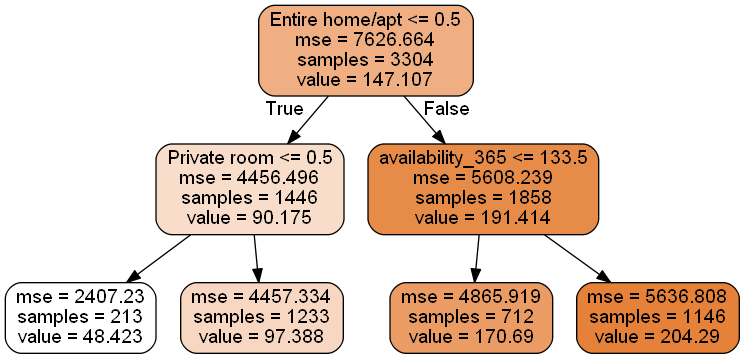

#### Initial CART accuracy for the Airbnb SG dataset

In [48]:
print('CART training R^2 is', decision_tree.score(x_train2, y_train2))
print('CART testing R^2 is', decision_tree.score(x_test2, y_test2))

CART training R^2 is 0.5525017091831769
CART testing R^2 is 0.48234421237344605


#### 2.2.1a Random Forest - Ensemble of Decision Trees for the HR Analytics dataset

Once again, although the CART allows us to get a quick overview of important features, we will use the Random Forest algorithm for dataset benchmarking and the aggregated identification of important predictor variables through the majority voting mechanism.

In [49]:
# Using 5 K-folds cross-validation, we will use GridSearchCV to tune the max_depth and n_estimator parameters for the RF model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
parameters = {
    'n_estimators': [5, 50, 100, 500],
    'max_depth': [2, 4, 6, 8, 16, 32, None]

}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features_airbnb,tr_labels_airbnb.values.ravel())

print_results(cv)

Best Parameters: {'max_depth': 16, 'n_estimators': 500}

0.371 (+/-0.043) for {'max_depth': 2, 'n_estimators': 5}
0.373 (+/-0.053) for {'max_depth': 2, 'n_estimators': 50}
0.373 (+/-0.054) for {'max_depth': 2, 'n_estimators': 100}
0.371 (+/-0.056) for {'max_depth': 2, 'n_estimators': 500}
0.43 (+/-0.063) for {'max_depth': 4, 'n_estimators': 5}
0.442 (+/-0.063) for {'max_depth': 4, 'n_estimators': 50}
0.441 (+/-0.069) for {'max_depth': 4, 'n_estimators': 100}
0.443 (+/-0.069) for {'max_depth': 4, 'n_estimators': 500}
0.466 (+/-0.078) for {'max_depth': 6, 'n_estimators': 5}
0.485 (+/-0.08) for {'max_depth': 6, 'n_estimators': 50}
0.488 (+/-0.076) for {'max_depth': 6, 'n_estimators': 100}
0.488 (+/-0.078) for {'max_depth': 6, 'n_estimators': 500}
0.494 (+/-0.087) for {'max_depth': 8, 'n_estimators': 5}
0.514 (+/-0.077) for {'max_depth': 8, 'n_estimators': 50}
0.516 (+/-0.085) for {'max_depth': 8, 'n_estimators': 100}
0.517 (+/-0.082) for {'max_depth': 8, 'n_estimators': 500}
0.487 (+/-0.0

The best max_depth and n_estimator hyperparameters for our RandomForest Model is 16 and 100, respectively.

In [50]:
# Checking the RF R^2 value by using the Score function
print('rf training R^2 is: ',cv.score(tr_features_airbnb,tr_labels_airbnb))
print('rf testing R^2 is: ',cv.score(test_features_airbnb,test_labels_airbnb))

rf training R^2 is:  0.8810147080417892
rf testing R^2 is:  0.5683235360415728


In [51]:
from sklearn.metrics import mean_absolute_error

print('rf training MAE is: ', mean_absolute_error(cv.predict(tr_features_airbnb), tr_labels_airbnb))
print('rf testing MAE is: ', mean_absolute_error(cv.predict(test_features_airbnb), test_labels_airbnb))

rf training MAE is:  21.15298474627658
rf testing MAE is:  40.30885180214336


In [52]:
print('rf training RMSE is: ', np.sqrt(mean_squared_error(cv.predict(tr_features_airbnb), tr_labels_airbnb)))
print('rf testing RMSE is: ', np.sqrt(mean_squared_error(cv.predict(test_features_airbnb), test_labels_airbnb)))

rf training RMSE is:  30.176387480430456
rf testing RMSE is:  57.26799523741539


#### 2.2.1b Feature Selection - Trees Regressor (Filter Method) and Recursive Feature Elimination (Wrapper Method)

#### Random Trees

In [53]:
# Identifying important features using Random Forest
feature_importances = pd.DataFrame(cv.best_estimator_.feature_importances_,
                                   index = tr_features_airbnb.columns,
                                    columns=['importance']).sort_values('importance',                                                                 
                                                                        ascending=False)
feature_importances

,importance
Entire home/apt,0.357242
availability_365,0.194244
minimum_nights,0.093508
reviews_per_month,0.079870
number_of_reviews,0.062173
Downtown Core,0.026423
Geylang,0.022336
Orchard,0.017176
Rochor,0.013136
Kallang,0.012904


#### Extra Trees Classifiers

In [54]:
# Identifying important features using Extra Trees (another Tree-based model)
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(tr_features_airbnb,tr_labels_airbnb.values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[1.09218676e-01 7.07772522e-02 7.71223556e-02 1.86085380e-01
 3.43586523e-01 8.73102633e-03 9.45845692e-03 4.20935862e-03
 2.31788655e-03 9.10229428e-03 3.20529648e-03 4.72706312e-04
 2.17746285e-02 2.21428845e-02 2.22166418e-04 1.22111742e-02
 1.04674625e-02 1.27705602e-03 6.94311521e-03 1.11744855e-02
 1.84084232e-02 8.34978461e-03 7.75013203e-03 8.15422977e-03
 1.04879233e-02 1.48772452e-03 6.44651509e-03 2.49479574e-03
 9.01005572e-03 6.54801204e-03 4.21373781e-03 4.24308077e-03
 4.12733713e-04 1.49266615e-03]


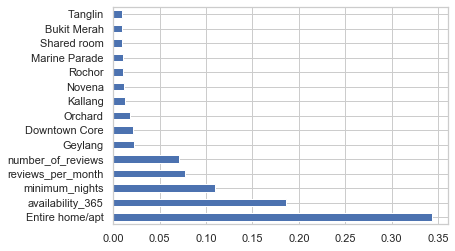

In [55]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=tr_features_airbnb.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

Based on an ensemble of 500 independent decision trees, the 15 features that achieved the highest votes for their importance are:
1. Entire home/apt
2. availability_365
3. minimum_nights
4. reviews_per_month
5. number_of_reviews
6. Downtown Core
7. Geylang
8. Orchard
9. Rochor
10. Kallang
11. Novena
12. Marine Parade
13. Shared room
14. Bukit Merah
15. Tanglin

These insights could be later used to build a more refined model with improved model scores with reduced dimensionality and complexity.

#### Recursive Feature Elimination

In [56]:
from sklearn.feature_selection import RFE

model = LinearRegression() # Initializing RFE model
rfe = RFE(model, 7) # Transforming data using RFE
X_rfe = rfe.fit_transform(x_data2,y_data2)  # Fitting the data to model
model.fit(X_rfe,y_data2)

print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False  True  True  True False
 False False False  True False False False False False False False False
 False False  True False False  True  True False False False]
[23 25 22 28 15 16 17 24  1  1  1 19 12  8 20  1  5  7  9 10 13  3  2  6
  4 27  1 14 11  1  1 26 18 21]


In [57]:
# No of features
nof_list=np.arange(1,35)            
high_score=0

# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, test_size=0.4, random_state=2)
    x_val2, x_test2, y_val2, y_test2 = train_test_split(x_test2, y_test2, test_size=0.5, random_state=2)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(x_train2,y_train2)
    X_test_rfe = rfe.transform(x_test2)
    model.fit(X_train_rfe,y_train2)
    score = model.score(X_test_rfe,y_test2)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)   
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 34
Score with 34 features: 0.439451


In [58]:
cols = list(x_data2.columns)
model = LinearRegression() # Initializing RFE model
rfe = RFE(model,34)             # Transforming data using RFE
X_rfe = rfe.fit_transform(x_data2,y_data2)  # Fitting the data to model
model.fit(X_rfe,y_data2)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)
print('LR training R^2 is: ',model.score(X_rfe,y_data2)) 

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365', 'Entire home/apt', 'Private room', 'Shared room',
       'Bedok', 'Bishan', 'Bukit Merah', 'Bukit Timah',
       'Central Water Catchment', 'Downtown Core', 'Geylang', 'Hougang',
       'Kallang', 'Marine Parade', 'Museum', 'Newton', 'Novena', 'Orchard',
       'Outram', 'Queenstown', 'River Valley', 'Rochor', 'Serangoon',
       'Singapore River', 'Southern Islands', 'Tanglin', 'Toa Payoh',
       'Central Region', 'East Region', 'North Region', 'North-East Region'],
      dtype='object')
LR training accuracy is:  0.443393514001622


In [59]:
list(feature_importances.index)

['Entire home/apt',
 'availability_365',
 'minimum_nights',
 'reviews_per_month',
 'number_of_reviews',
 'Downtown Core',
 'Geylang',
 'Orchard',
 'Rochor',
 'Kallang',
 'Novena',
 'Private room',
 'Shared room',
 'Marine Parade',
 'Outram',
 'Bukit Merah',
 'Newton',
 'Tanglin',
 'River Valley',
 'Singapore River',
 'Toa Payoh',
 'Queenstown',
 'Bedok',
 'East Region',
 'Central Region',
 'Bukit Timah',
 'Southern Islands',
 'Bishan',
 'North-East Region',
 'Serangoon',
 'Museum',
 'Hougang',
 'Central Water Catchment',
 'North Region']

Based the findings of these feature selection methods, we will reduce the dimensionality of our dataset to the top 15 features identified. And reassess their R^2, MAE and RMSE values to see the difference.

[Back to Top ^](#airbnb_header)

### 2.3 Build and Tune Models <a id='build2' />

In [80]:
tr_features_airbnb = tr_features_airbnb[['Entire home/apt','availability_365','minimum_nights','reviews_per_month',
                                        'number_of_reviews','Downtown Core','Geylang','Orchard','Rochor','Kallang',
                                        'Shared room','Novena','Private room', 'Marine Parade', 'Outram']]

val_features_airbnb = val_features_airbnb[['Entire home/apt','availability_365','minimum_nights','reviews_per_month',
                                        'number_of_reviews','Downtown Core','Geylang','Orchard','Rochor','Kallang',
                                        'Shared room','Novena','Private room', 'Marine Parade', 'Outram']]

test_features_airbnb = test_features_airbnb[['Entire home/apt','availability_365','minimum_nights','reviews_per_month',
                                        'number_of_reviews','Downtown Core','Geylang','Orchard','Rochor','Kallang',
                                        'Shared room','Novena','Private room', 'Marine Parade', 'Outram']]

#### 2.3.1 Random Forest Regressor for the Airbnb Singapore dataset

In [81]:
# Reassess the RF R^2 value/Accuracy by using the Score function, following feature selection
cv.fit(tr_features_airbnb,tr_labels_airbnb.values.ravel())
print('rf training R^2 is: ',cv.score(tr_features_airbnb,tr_labels_airbnb))
print('rf validation R^2 is: ',cv.score(val_features_airbnb,val_labels_airbnb))

rf training R^2 is:  0.5118792291112553
rf validation R^2 is:  0.47522746108771363


Compared to the initial run of the Random Forest model, the overfitting has been significantly reduced, while testing R^2 score has only dropped slightly compared to the previously overfitted model.

In [82]:
parameters = {
    'n_estimators': [500],
    'max_depth': [16],
    'min_samples_leaf': [7]

}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features_airbnb,tr_labels_airbnb.values.ravel())

print('rf training R^2 is: ',cv.score(tr_features_airbnb,tr_labels_airbnb))
print('rf testing R^2 is: ',cv.score(test_features_airbnb,test_labels_airbnb))

rf training R^2 is:  0.6672590388383566
rf testing R^2 is:  0.5452294608268229


Tuning the min_samples_leaf hyperparameter of the Random Forest model helped boost its testing accuracy

In [83]:
print('rf training MAE is: ', mean_absolute_error(cv.predict(tr_features_airbnb), tr_labels_airbnb))
print('rf testing MAE is: ', mean_absolute_error(cv.predict(test_features_airbnb), test_labels_airbnb))

rf training MAE is:  36.217912726347095
rf testing MAE is:  42.68750896681765


In [84]:
print('rf training RMSE is: ', np.sqrt(mean_squared_error(cv.predict(tr_features_airbnb), tr_labels_airbnb)))
print('rf testing RMSE is: ', np.sqrt(mean_squared_error(cv.predict(test_features_airbnb), test_labels_airbnb)))

rf training RMSE is:  50.46307845785271
rf testing RMSE is:  58.77991533588497


#### 2.3.2 XGBoost for the Airbnb Singapore dataset

In [85]:
# Using 5 K-folds cross-validation, we will use GridSearchCV to tune the max_depth and alpha parameters for the XGBoost model
from xgboost import XGBRegressor
xg_regress = XGBRegressor(default = 'reg:squarederror')
parameters = {
    'max_depth': [1, 3, 4, 5],
    'alpha': [5, 10, 15, 20],
    'n_estimators': [5, 10, 50, 100]
}

cv = GridSearchCV(xg_regress, parameters, cv=5)
cv.fit(tr_features_airbnb,tr_labels_airbnb.values.ravel())

print_results(cv)

[20:06:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[20:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[20:07:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[20:07:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[20:07:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [108]:
print('XGBR training R^2 is: ',cv.score(tr_features_airbnb,tr_labels_airbnb))
print('XGBR validation R^2 is: ',cv.score(val_features_airbnb,val_labels_airbnb))

XGBR training R^2 is:  0.49054286377640355
XGBR validation R^2 is:  0.4667726201912521


In [109]:
parameters = {
    'max_depth': [5],
    'alpha': [5],
    'n_estimators': [100],
    'learning_rate': [0.15]
    
}

cv = GridSearchCV(xg_regress, parameters, cv=5)
cv.fit(tr_features_airbnb,tr_labels_airbnb.values.ravel())

print('XGBoost Regressor (XGBR) training accuracy is: ',cv.score(tr_features_airbnb,tr_labels_airbnb))
print('XGBoost Regressor (XGBR) testing accuracy is: ',cv.score(test_features_airbnb,test_labels_airbnb))

[20:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regressor (XGBR) training accuracy is:  0.7471057635181817
XGBoost Regressor (XGBR) testing accuracy is:  0.5338254234241131


Setting the learning_rate hyperparameter to 0.15 boosted the R^2 score 

In [110]:
print('XGBR training MAE is: ', mean_absolute_error(cv.predict(tr_features_airbnb), tr_labels_airbnb))
print('XGBR testing MAE is: ', mean_absolute_error(cv.predict(test_features_airbnb), test_labels_airbnb))

XGBR training MAE is:  31.77217324613274
XGBR testing MAE is:  43.27156731929571


In [111]:
print('XGBR training RMSE is: ', np.sqrt(mean_squared_error(cv.predict(tr_features_airbnb), tr_labels_airbnb)))
print('XGBR testing RMSE is: ', np.sqrt(mean_squared_error(cv.predict(test_features_airbnb), test_labels_airbnb)))

XGBR training RMSE is:  43.9936578898209
XGBR testing RMSE is:  59.51234829709751


#### 2.3.3 Multilayer Perceptron (Artificial Neural Network) for the Airbnb Singapore dataset

In [112]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(max_iter = 6000)
parameters = {
    'hidden_layer_sizes': [(5,), (10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'identity'],
    'learning_rate': ['constant','invscaling', 'adaptive']
}

cv = GridSearchCV(MLP, parameters, cv=5)
cv.fit(tr_features_airbnb,tr_labels_airbnb.values.ravel())

print_results(cv)

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.42 (+/-0.055) for {'activation': 'relu', 'hidden_layer_sizes': (5,), 'learning_rate': 'constant'}
0.425 (+/-0.065) for {'activation': 'relu', 'hidden_layer_sizes': (5,), 'learning_rate': 'invscaling'}
0.421 (+/-0.061) for {'activation': 'relu', 'hidden_layer_sizes': (5,), 'learning_rate': 'adaptive'}
0.432 (+/-0.061) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.425 (+/-0.059) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.425 (+/-0.056) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.428 (+/-0.071) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.422 (+/-0.055) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.431 (+/-0.064) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning

In [113]:
print('MLP training R^2 is: ',cv.score(tr_features_airbnb,tr_labels_airbnb))
print('MLP validation R^2 is: ',cv.score(val_features_airbnb,val_labels_airbnb))

MLP training accuracy is:  0.5040912792381919
MLP validation accuracy is:  0.4714194375333749


In [114]:
parameters = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['tanh'],
    'learning_rate': ['constant'],
    'alpha': [0.008]
}

cv = GridSearchCV(MLP, parameters, cv=5)
cv.fit(tr_features_airbnb,tr_labels_airbnb.values.ravel())

print('MLP training R^2 is: ',cv.score(tr_features_airbnb,tr_labels_airbnb))
print('MLP testing R^2 is: ',cv.score(test_features_airbnb,test_labels_airbnb))

MLP training R^2 is:  0.4942870809798547
MLP testing R^2 is:  0.4768001564697157


Tuning the alpha hyperparameter marginally improves the model's R^2 score but which still remains low at <0.50 (worse than the flip of a coin).

In [115]:
print('MLP training MAE is: ', mean_absolute_error(cv.predict(tr_features_airbnb), tr_labels_airbnb))
print('MLP testing MAE is: ', mean_absolute_error(cv.predict(test_features_airbnb), test_labels_airbnb))

MLP training MAE is:  46.92456864429583
MLP testing MAE is:  47.32946510062326


In [116]:
print('MLP training RMSE is: ', np.sqrt(mean_squared_error(cv.predict(tr_features_airbnb), tr_labels_airbnb)))
print('MLP testing RMSE is: ', np.sqrt(mean_squared_error(cv.predict(test_features_airbnb), test_labels_airbnb)))

MLP training RMSE is:  62.21178057308336
MLP testing RMSE is:  63.04731523972242


Despite MLP being a class of feedforward Artificial Neural Network (ANN), which is known to be a powerful predictive algorithm (if somewhat of a black box in terms of interpretability), it was actually the worst performer of all the models for our dataset.

[Back to Top ^](#airbnb_header)

### 2.4 Create an Ensemble Model and Evaluate <a id='evaluate2' /> 

#### Ensemble Model built using Random Forest, XGBoost Regressor and Multilayer Perceptron for Airbnb Singapore dataset

In [117]:
# Voting Classifier - Multiple Ensemble Model
from sklearn.ensemble import VotingRegressor

rf = RandomForestRegressor(n_estimators=500, max_depth = 16, min_samples_leaf = 7)
xg_regress = XGBRegressor(default = 'reg:squarederror', max_depth = 5, alpha = 5, n_estimators = 50, learning_rate = 0.15)
MLP = MLPRegressor(max_iter = 6000, activation = 'tanh', hidden_layer_sizes = (100,), learning_rate = 'constant', alpha = 0.008)

In [118]:
evr = VotingRegressor([('rf',rf),('xg_regress',xg_regress),('MLP',MLP)])

In [119]:
evr.fit(tr_features_airbnb, tr_labels_airbnb.values.ravel())
print('EVR training R^2 is', evr.score(tr_features_airbnb, tr_labels_airbnb.values.ravel()))
print('EVR testing R^2 is', evr.score(val_features_airbnb, val_labels_airbnb.values.ravel()))

[20:29:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EVR training R^2 is 0.6337532353446069
EVR testing R^2 is 0.5279703652015575


In [120]:
print('EVR training MAE is: ', mean_absolute_error(cv.predict(tr_features_airbnb), tr_labels_airbnb))
print('EVR testing MAE is: ', mean_absolute_error(cv.predict(test_features_airbnb), test_labels_airbnb))

EVR training MAE is:  46.92456864429583
EVR testing MAE is:  47.32946510062326


In [121]:
print('EVR training RMSE is: ', np.sqrt(mean_squared_error(cv.predict(tr_features_airbnb), tr_labels_airbnb)))
print('EVR testing RMSE is: ', np.sqrt(mean_squared_error(cv.predict(test_features_airbnb), test_labels_airbnb)))

EVR training RMSE is:  62.21178057308336
EVR testing RMSE is:  63.04731523972242


The EVR model failed to produce a better overall R^2, MAE and RMSE score despite being a combined model of all three.

[Back to Top ^](#airbnb_header)

### 2.5 Summary <a id='summary2' /> 

1. The Random Forest Regressor had the highest testing R^2 score at 0.5452, with the lowest MAE and RMSE - 42.688 and 58.780, respectively.
2. Overall, all models posted low testing accuracies, likely due to the limited dataset size (>40% of the dataset was removed during data cleanup) and messy data.
3. Model accuracy may be increased by using a larger dataset and focusing the data on one or two specific data categories such as room type or location.
4. Obtaining more features - like ratings (on a 5-point scale) or whether a host has SuperHost status (an Airbnb badge to distinguish hosts with exceptional service standards)  - might also be another way to improve model accuracy. 

[Back to Top ^](#airbnb_header)